In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [4]:
housing = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/BostonHousing.csv')
housing.head(3)

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7

In [5]:
# Missing Data

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
pd.isnull(housing).any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
b          False
lstat      False
medv       False
dtype: bool

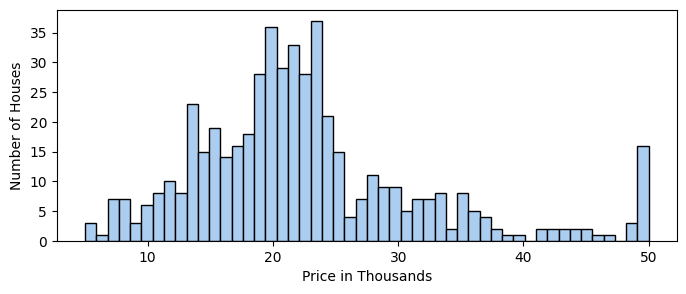

In [7]:
# Histogram

plt.figure(figsize = (8,3))
plt.hist(housing['medv'], bins = 50, edgecolor = 'black', color = '#abcdef')
plt.xlabel('Price in Thousands')
plt.ylabel('Number of Houses')
plt.show()

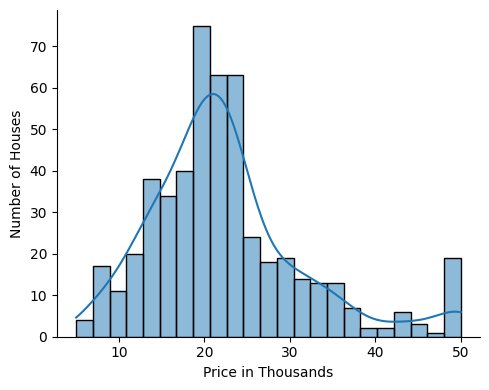

In [8]:
# Distribution Plot

sns.displot(housing['medv'], height = 4, aspect = 1.25, kde = True)
plt.ylabel('Number of Houses')
plt.xlabel('Price in Thousands')
plt.show()

In [9]:
# What is the average number of rooms?

housing['rm'].mean()

6.284634387351779

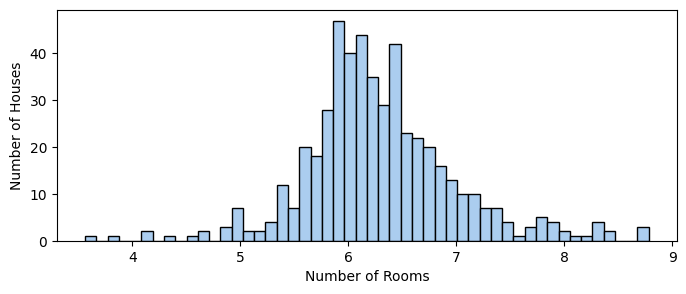

In [10]:
# Histogram

plt.figure(figsize = (8,3))
plt.hist(housing['rm'], bins = 50, edgecolor = 'black', color = '#abcdef')
plt.xlabel('Number of Rooms')
plt.ylabel('Number of Houses')
plt.show()

In [11]:
# How many houses are near Charles River?

housing['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [12]:
# Exploratory Data Analysis

housing.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [13]:
# Correlation

# Correlation of Prices with Number of Rooms?

housing['medv'].corr(housing['rm'])

0.6953599470715393

In [14]:
# Correlation of Prices with Pupil-Teach Ratio?

housing['medv'].corr(housing['ptratio'])

-0.5077866855375616

In [15]:
# View all correlations

housing.corr() # Pearson Correlation Coefficients

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
lstat    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
medv    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              dis       rad       tax   ptratio         b     lstat      medv  
crim    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
zn       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
indus   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
chas    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
nox     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
rm       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
age     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
dis      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
rad     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
tax     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
ptratio -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
b        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
lstat   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
medv     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [16]:
# Masking

mask = np.zeros_like(housing.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

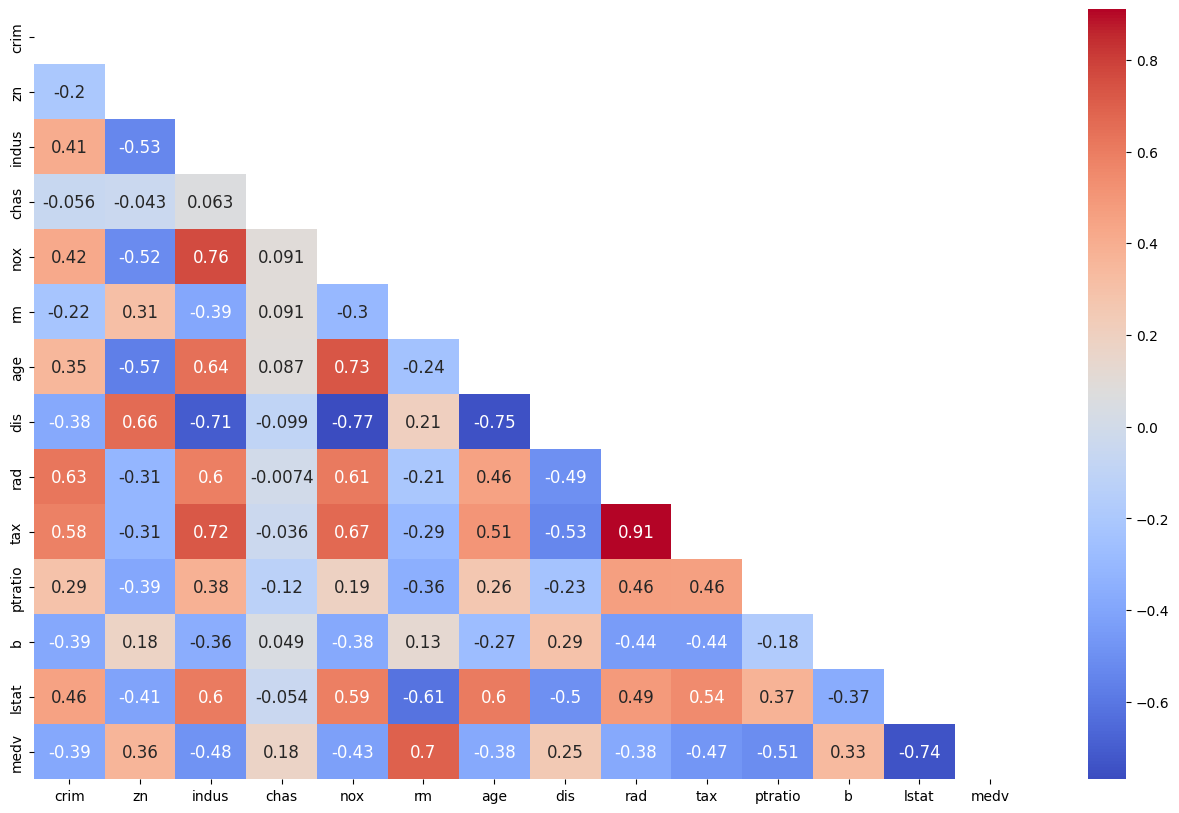

In [17]:
# Use Heatmaps

plt.figure(figsize = (16,10))
sns.heatmap(housing.corr(), mask = mask, cmap = 'coolwarm', annot = True, annot_kws = {"size": 12})
plt.show()

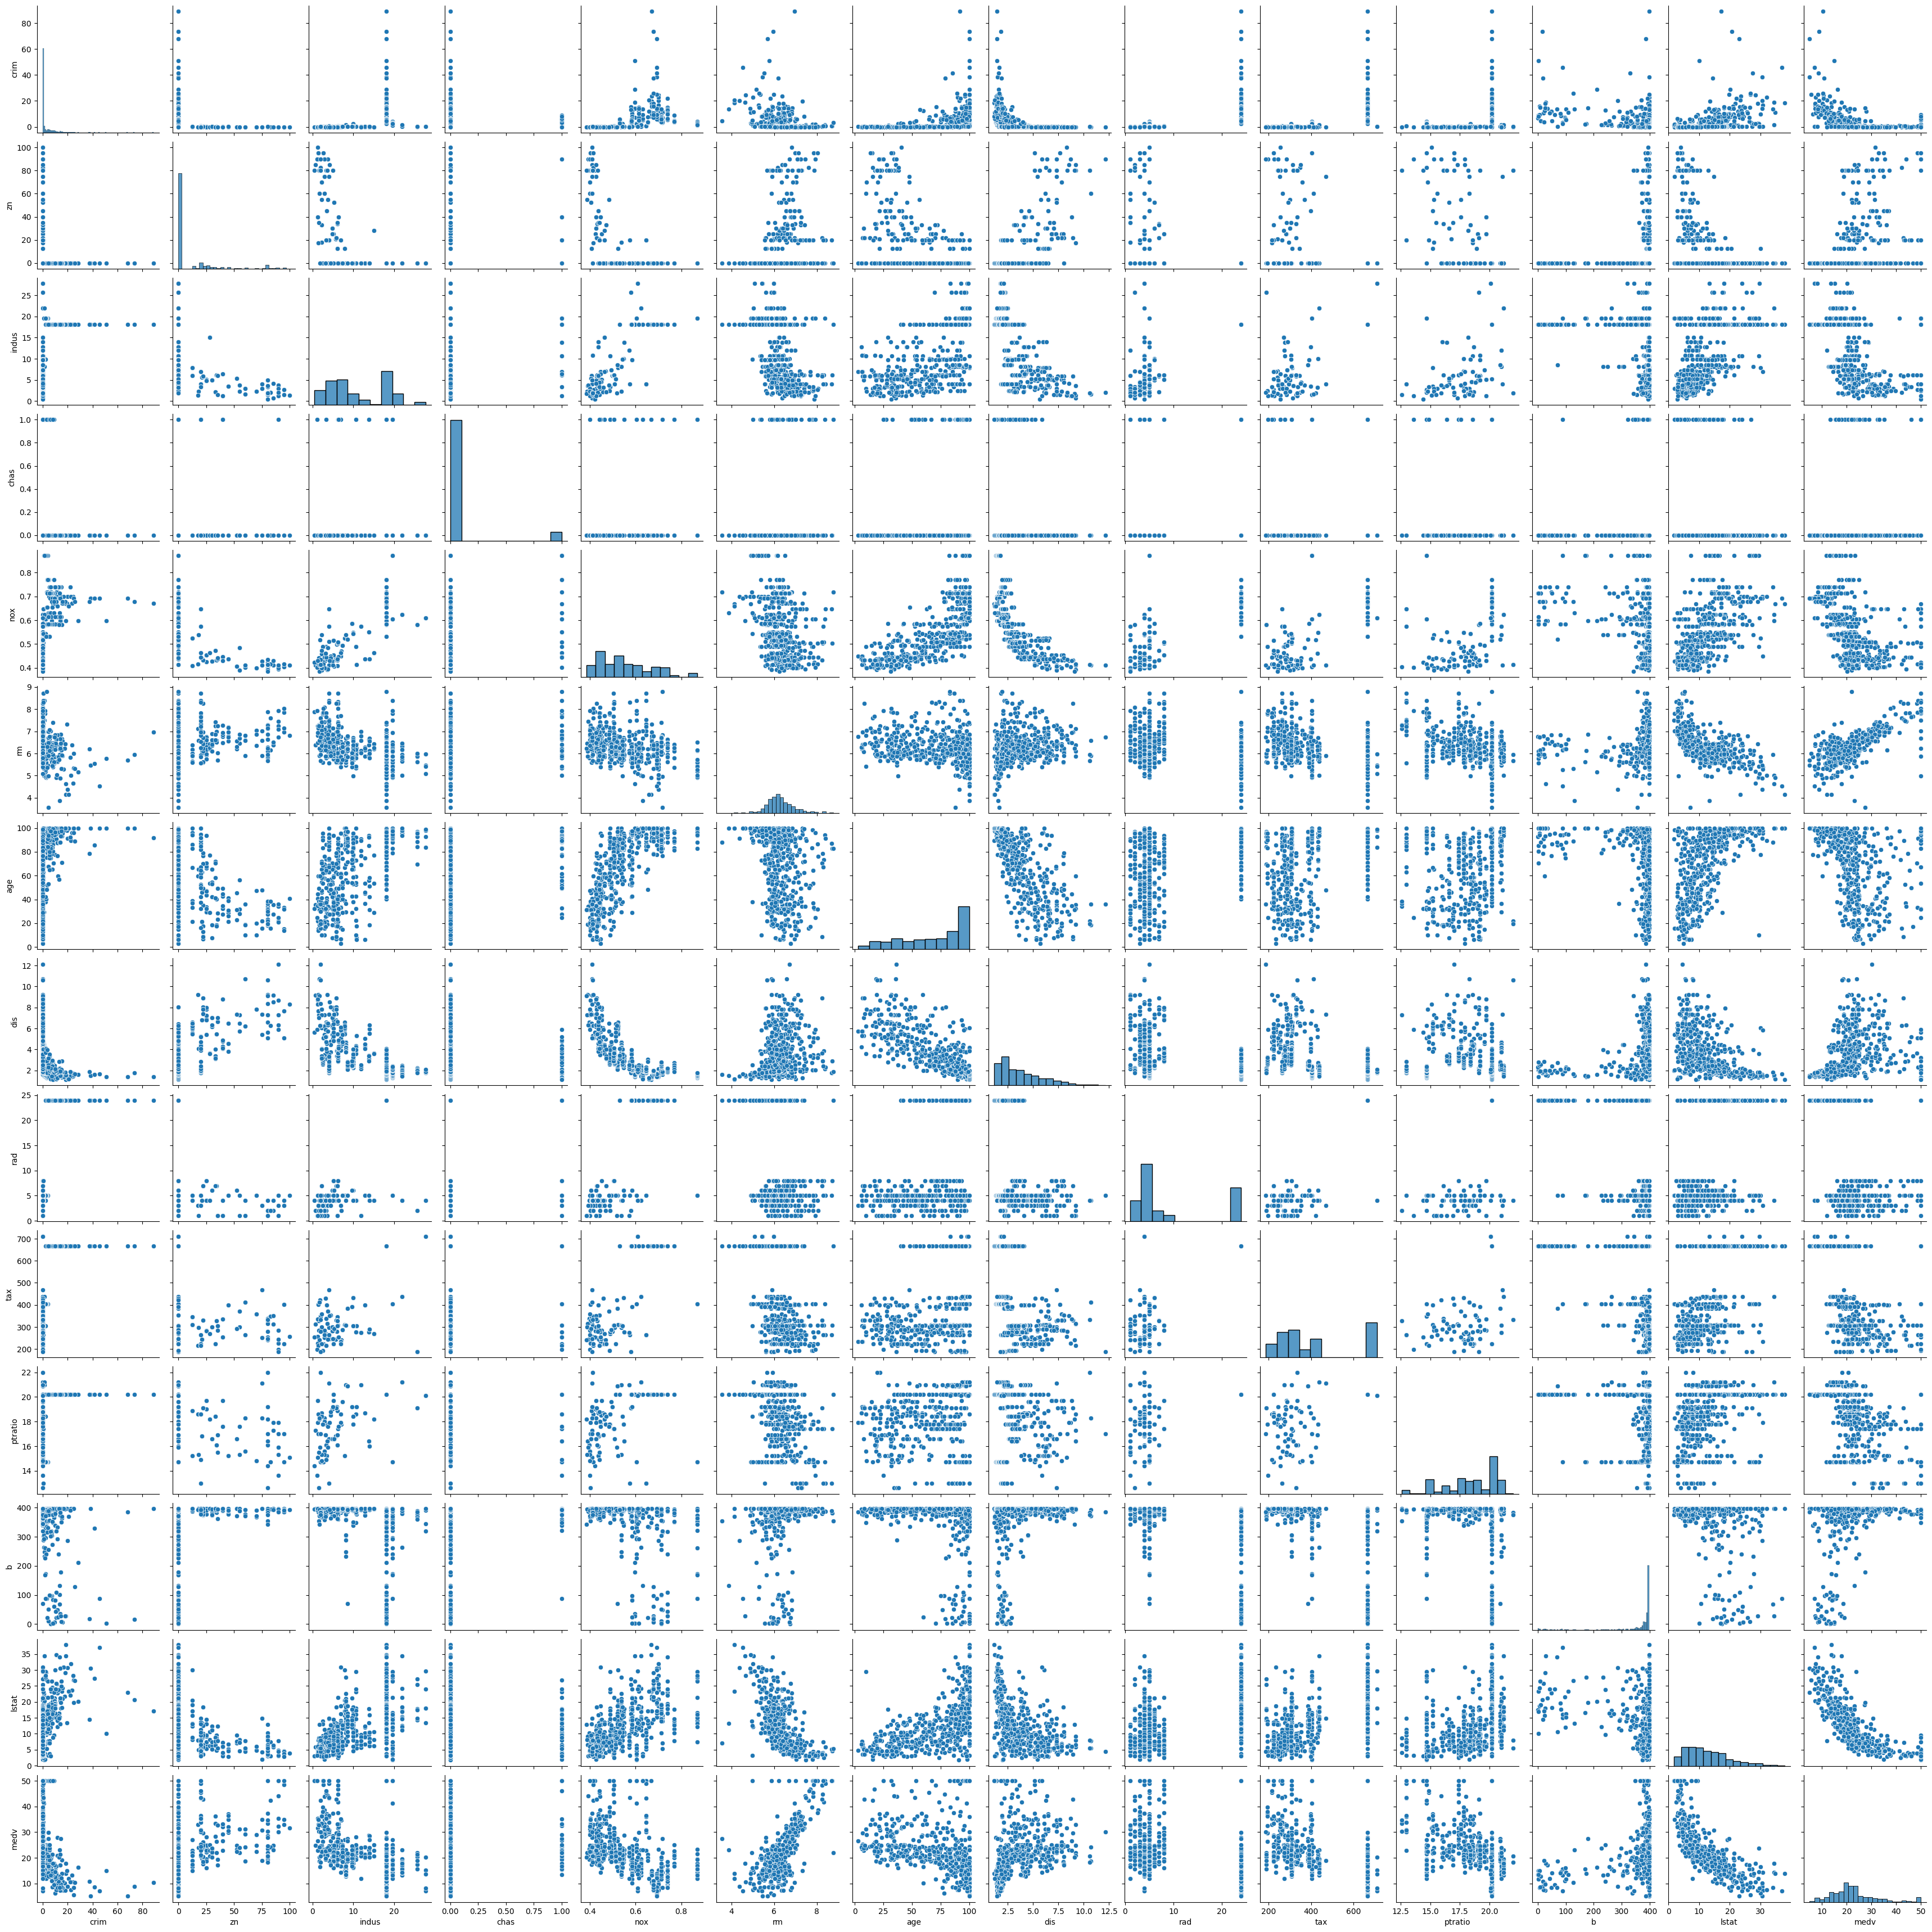

CPU times: user 1min 6s, sys: 821 ms, total: 1min 7s
Wall time: 1min 7s


In [18]:
%%time

sns.pairplot(housing)
plt.show()

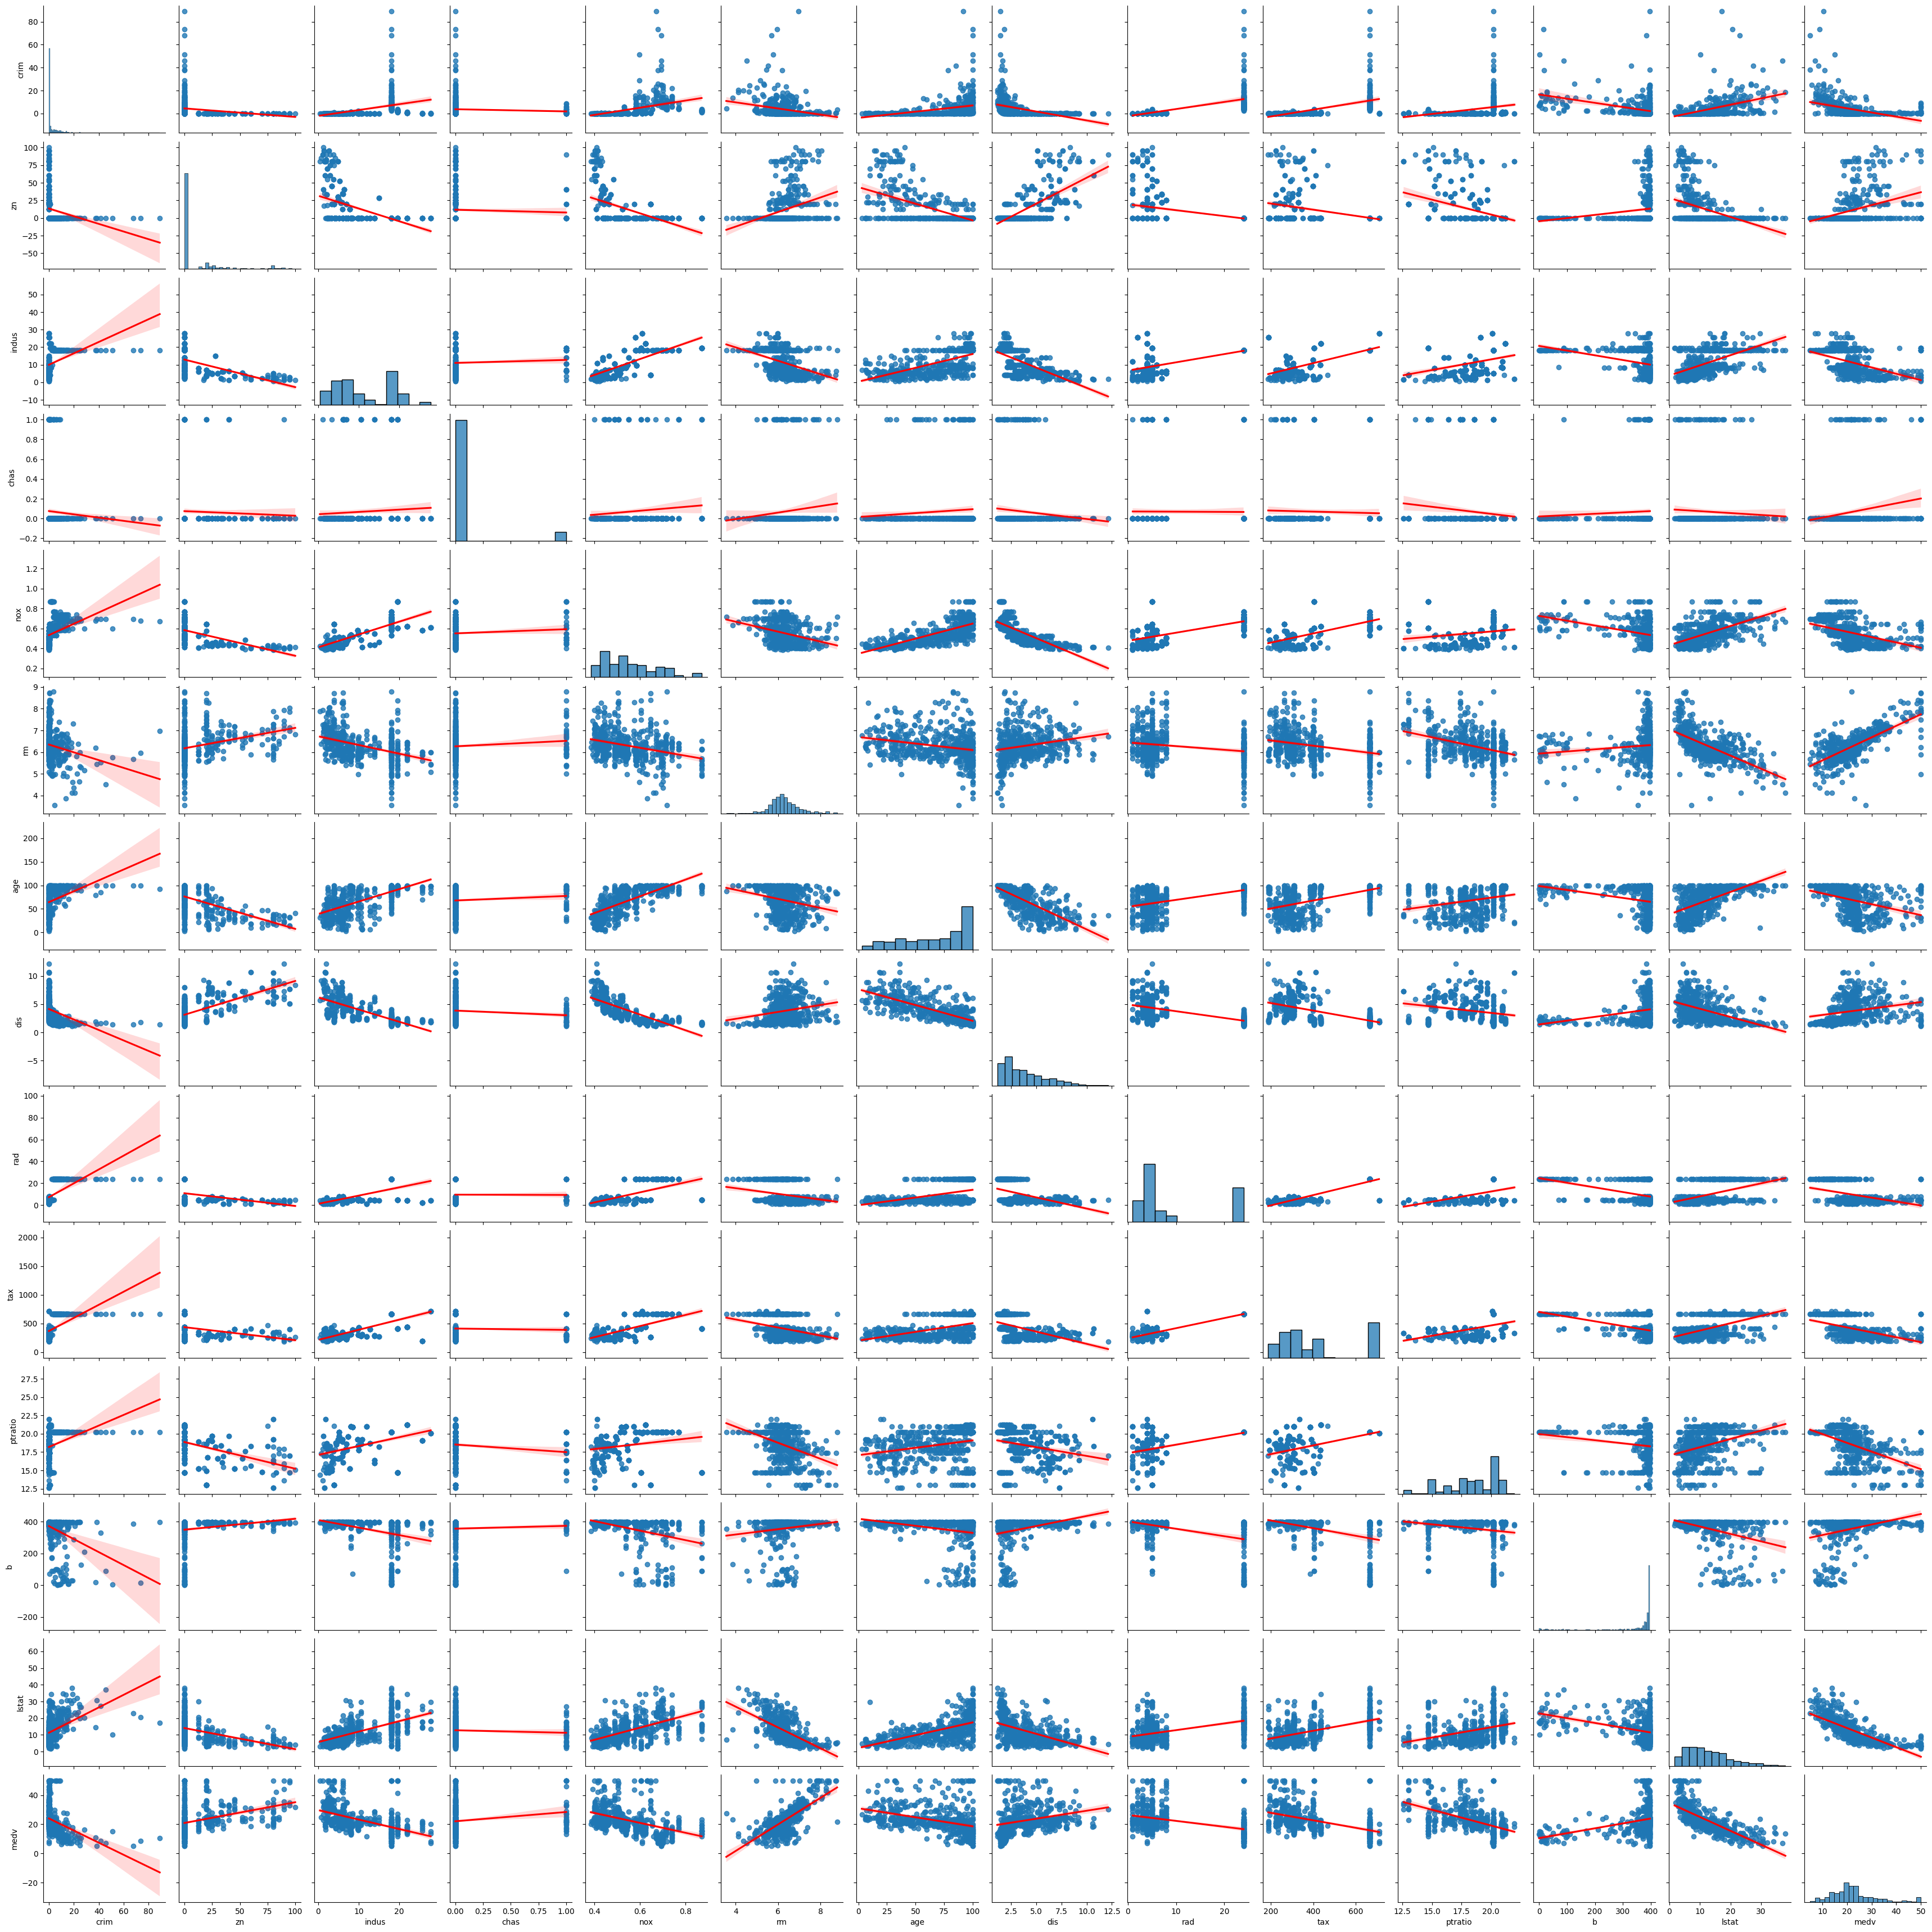

In [19]:
# Pairplot with Regression Lines

sns.pairplot(housing, kind = 'reg', plot_kws = {'line_kws': {'color': 'red'}})

In [20]:
# Assign target and features

prices = housing['medv']
features = housing[['rm', 'nox', 'ptratio', 'crim', 'dis', 'lstat']]

In [21]:
# Imports, Train/Test Split, Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, random_state = 10)
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Based on Analyis (rm, nox, ptratio, crim, dis, lstat)

print('Intercept', model.intercept_)
pd.DataFrame(data = model.coef_, index = X_train.columns, columns = ['coefficient'])

Intercept 36.66420317345266


coefficient
rm          3.720094
nox       -15.622704
ptratio    -0.907838
crim       -0.092977
dis        -1.141665
lstat      -0.597567

In [56]:
# Sample Interpretations

# For every 1 room added to a house, there is an increase of 3.72K in house price
# For every 1 unit increase in polution, there is a decrease of 15.62K in house price

<Axes: xlabel='medv'>

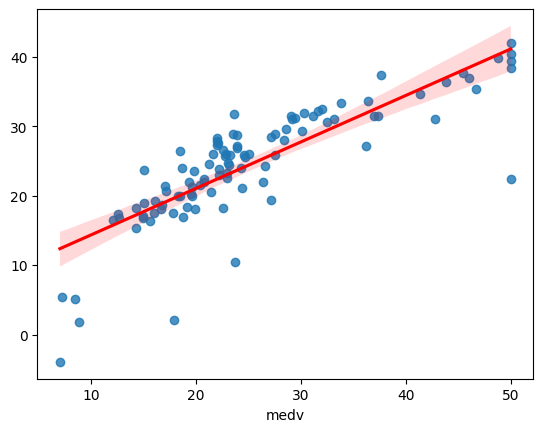

In [57]:
# Predictions

predictions = model.predict(X_test)

# Plot

sns.regplot(x = y_test, y = predictions, line_kws = {'color': 'red'})

In [45]:
# Sample Prediciton - Single Data (rm, nox, ptratio, crim, dis, lstat)

y_predict = model.predict([[3, 0.5, 10, 0.5, 0.5, 1.5]])
print(y_predict)

[29.42107727]


In [58]:
# Sample Prediction - Multiple Data (rm, nox, ptratio, crim, dis, lstat)

d = [[7, 0.5, 10, 0.5, 0.5, 1.5],
     [3, 0.6, 5, 0.5, 0.5, 1.5],
     [6, 1, 3, 1, 3, 5]]

y_predict = model.predict(d) # model prediction

df_features = pd.DataFrame(d) # feature dataframe
df_predictions = pd.DataFrame(y_predict) # prediction dataframe

final_df = pd.concat([df_features, df_predictions], axis = 1) # concatenate feature and prediction dataframe on the x-axis

# Modify column names of the dataframe

final_df.columns = ['Rooms', 'Polution Level',
                'Teacher-Student Ratio',
                'Crime Rate', 'Distance to Jobs',
                'Low Income Neighbors', 'Projected House Price']

final_df.style.set_properties(**{'text-align': 'center'}) # center align dataframe contents